# 12 - Strojno učenje za kategorizacijo podatkov
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, avgust 2024 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
   
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

Dandanes je uporaba različnih algoritmov strojnega učenja (Machine Learning, ML) v 
znanosti že rutinsko opravilo. Poznamo tri osnovne vrste stojnega učenja:

  - Nadzorovano učenje (Supervised learning):
    - Klasifikacija (Classification): sortiranje v različne kategorije.
    - Regresija (Regression): modeliranje oz. `fitanje' napovedi.
  - Nenadzorovano učenje ( npr. sam najdi kategorije).
  - Stimulirano učenje ( Artificial Intelligence v ožjem pomenu besede).

V fiziki (in tej nalogi), se tipično ukvarjamo s prvo kategorijo, bodisi za identifikacijo novih pojavov delcev ali pa za ekstrakcijo napovedi (netrivialnih funkcijskih odvisnosti etc).

ML algoritmi imajo prednost pred klasičnim pristopom, da lahko učinkovito razdrobijo kompleksen problem na enostavne elemente in ga ustrezno opišejo:

  - pomisli na primer, kako bi bilo težko kar predpostaviti/uganiti 
  pravo analitično funkcijo v več dimenzijah ( in je npr. uporaba zlepkov 
  (spline interpolacija) mnogo lažja in boljša ).
  - Pri izbiri/filtriranju velike količine podatkov z mnogo lastnostmi 
  (npr dogodki pri trkih na LHC) je zelo težko najti količine, ki optimalno 
  ločijo signal od ozadnja, upoštevati vse korelacije in najti optimalno kombinacijo 
  le-teh

Če dodamo malce matematičnega formalizma strojnega učenja: Predpostavi, da imamo na voljo nabor primerov 
$\mathcal{D}=\left\{\left(\mathbf{x}_{k}, y_{k}\right)\right\}_{k=1 . N},$ kjer je
$\mathbf{x}_{k}=\left(x_{k}^{1}, \ldots, x_{k}^{M}\right)$ naključno izbrani vektor
 $M$ lastnosti (karakteristik) in je $\mathbf{y}_{k} = \left(y_{k}^{1}, \ldots, y_{k}^{Q}\right)$
 vektor $Q$ ciljnih vrednosti, ki so lahko bodisi binarne ali pa realna 
 števila. 
 Vrednosti $\left(\mathbf{x}_{k}, \mathbf{y}_{k}\right)$ so neodvisne in porazdeljene po neki
 neznani porazdelitvi $P(\cdot, \cdot) .$ Cilj ML metode je določiti (priučiti) funkcijo
 $h: \mathbb{R}^{Q} \rightarrow \mathbb{R}$, ki minimizira pričakovano vrednost **funkcije
 izgube (expected loss)** $$\mathcal{L}(h)=\mathbb{E}\, L(\mathbf{y}, \mathbf{h}(\mathbf{x})) = \frac{1}{N}\sum\limits_{k=1}^{N} L(\mathbf{y_k}, \mathbf{h}(\mathbf{x_k})). $$ 
 Tu je $L(\cdot, \cdot)$  gladka funkcija, ki opisuje oceno za kvaliteto napovedi, 
 pri čemer so  vrednosti $(\mathbf{x}, \mathbf{y})$
 neodvisno  vzorčene iz nabora $\mathcal{D}$ po porazdelitvi $P$. Po koncu učenja
 imamo torej na voljo funkcijo $\mathbf{h}(\mathbf{x})$, ki nam za nek vhodni nabor vrednosti
 $\mathbf{\hat{x}}$ poda napoved $\mathbf{\hat{y}}=\mathbf{h}(\mathbf{\hat{x}})$, ki ustrezno kategorizira
 ta nabor vrednosti. 
 
 Funkcije $\mathbf{h}$ so v praksi sestavljene iz (množice) preprostih funkcij z (nekaj) prostimi
 parametri, kar na koncu seveda pomeni velik skupni nabor neznanih parametrov in zahteven
 postopek minimizacije funkcije izgube. 
 
 Osnovni gradnik odločitvenih dreves je tako kar stopničasta funkcija $H(x_i-t_i)={0,1}$, ki je enaka
 ena za $x_i > t_i$ in nič drugače in kjer je $x_i$ ena izmed karakteristik in $t_i$ neznani parameter.
Iz skupine takšnih funkcij, ki predstavljajo binarne odločitve lahko skonstruiramo končno uteženo 
funkcijo $\mathbf{h}(\mathbf{x})=\sum\limits_{i=1}^{J} \mathbf{a}_{i}\, H(x_i-t_i),$ kjer so $\mathbf{a}_i$ vektorji neznanih uteži. 
Tako $t_i$ kot $\mathbf{b}_i$, lahko določimo v procesu učenja. Nadgradnjo predstavljajo nato *pospešena* odločitvena
drevesa (BDT), kjer nadomestimo napoved enega drevesa z uteženo množico le-teh, tipično dobljeno
v ustreznih iterativnih postopkih (npr. AdaBoost, Gradient Boost ipd.).

Pri nevronskih mrežah je osnovni gradnik t.i. *perceptron*, ki ga opisuje preprosta funkcija
$h_{w,b}(\mathbf{X})=\operatorname{\theta}\left(\mathbf{w}^{T} \cdot \mathbf{X} + b\right),$
kjer je $\mathbf{X}$ nabor vhodnih vrednosti, $\mathbf{w}$ vektor vrednosti uteži, s katerimi
tvorimo uteženo vsoto ter $b$ dodatni konstatni premik (bias). Funkcija $\theta$ je preprosta
gladka funkcija (npr. $\arctan$), ki lahko vpelje nelinearnost v odzivu perceptrona. Nevronska
mreža je nato sestavljena iz (poljubne) topologije takšnih perceptronov, ki na začetku
sprejme karakteristiko dogodka $\mathbf{x}$ v končni fazi rezultirajo v napovedi $\mathbf{\hat{y}}$, ki 
mora seveda biti čim bližje ciljni vrednosti $\mathbf{y}$. Z uporabo ustrezne funkcije 
izgube (npr MSE: $\mathcal{L}(h)=\mathbb{E}\, ||\mathbf{y}-\mathbf{\hat{y}}||^2$, se problem znova prevede na
minimizacijo, kjer iščemo optimalne vrednosti (velikega) nabora uteži $\mathbf{w}_i$ ter
$b_i$ za vse perceptrone v mreži. Globoke nevronske mreže (DNN) niso nič drugega, kot 
velike nevronske mreže ali skupine le-teh. 

Že namizni računalniki so
dovolj močni za  osnovne računske naloge, obstajajo pa tudi že zelo uporabniku prijazni vmesniki v jeziku Python, na primer:

  - Scikit-Learn (scikit-learn.org): odprtokodni paket za strojno učenje,
  - TensorFlow (tensorflow.org): odprtokodni Google-ov sistem za ML, s poudarkom na globokih nevronskih mrežah 
  ( Deep Neural Networks, DNN) z uporabo vmesnika Keras. Prilagojen za delo na GPU in TPU. 
  - Catboost: (Catboost.ai) : odprtokodna knjižnica za uporabo pospešenih odločitvenih dreves (Boosted Decision Trees, BDT). Prilagojena za delo na GPU.

Za potrebe naloge lahko uporabimo tudi spletni vmesnik Google Collab (colab.research.google.com), ki dopušča omejen dostop 
do večjih računskih zmogljivosti.


## Naloga

Na spletni učilnici je na voljo material (koda, vzorci) za 
ločevanje dogodkov Higgsovega bozona od ostalih procesov ozadja. V naboru simuliranih 
dogodkov je 18 karakteristik (zveznih kinematičnih lastnosti), katerih vsaka 
posamezno zelo slabo loči 'signal' od ozadja, z uporabo BDT ali (D)NN, pa lahko tu dosežemo
zelo dober uspeh.  Na predavanjih smo si ogledali glavne aspekte pomembne pri implementaciji ML, 
kot so  uporaba ustreznih spremenljivk (GIGO), učenje in prekomerno učenje (training/overtraining), 
vrednotenje uspeha metode kot razmerje med učinkovitostjo (efficiency) in čistostjo (precision) 
vzorca (Receiver Operating Characteristic, ROC). Določi uspešnost obeh metod (in nariši ROC) 
za nekaj tipičih konfiguracij BDT in DNN, pri čemer:

  - Študiraj vpliv uporabljenih vhodnih spremenljivk - kaj, če vzamemo le nekatere?
  - Študiraj BDT in NN in vrednoti uspešnost različnih nastavitev,  če spreminjaš nekaj konfiguracijskih parametrov
  (npr. število perceptronov in plasti nevronskih mrež pri DNN in število dreves pri BDT). 

**Dotatna naloga:**

Implementiraj distribucije iz ‘playground’ zgleda v BDT (lahko tudi RandomForests) in DNN,
te distribucije so na voljo v vseh popularnih ML paketih (npr. Scikit...).

In [170]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
import scipy as sc
from matplotlib import animation
import logging
import timeit
import time
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
plt.rcParams["figure.edgecolor"] = "black"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


## Dodatek - Klasifikacija sintetičnih distribucij

Tokrat dodatek postavimo na začetek poročila, da bolje ilustriramo, kaj bomo v nadaljevanju počeli. Želimo namreč  bomo na začetku s pomočjo DNN (Deep Neural Networks) in BDT (Boosted Decision Trees) klasificirali sintetične distribucije iz paketa `SciKit learn`. Iz tega početja lahko opazimo nekaj razlik v delovanju obeh klasifikacijskih metod.

Pri metodi BDT smo za hiperparametre nastavili:
- maksinalno število dreves: 100
- maksimalna globina drevesa: 6
- funkcija nečistosti: Logloss
- normalizacija: brez

Za DNN pa smo za hiperparametre uporabili:
- število nevronov: 50
- število skritih plasti: 5
- aktivacijska funkcija: ReLU
- aktivacijska funkcija na koncu: sigmoid
- optimizacijski algoritem: adam
- funkcija izgube: binary cross-entrophy
- normalizacija $\mu = 0$ in $\sigma = 1$
- število epoh: 200
- velikost batchov: 1000
- odstotek za testiranje: 20 %

In [171]:
import tensorflow as tf
from catboost import CatBoostClassifier
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


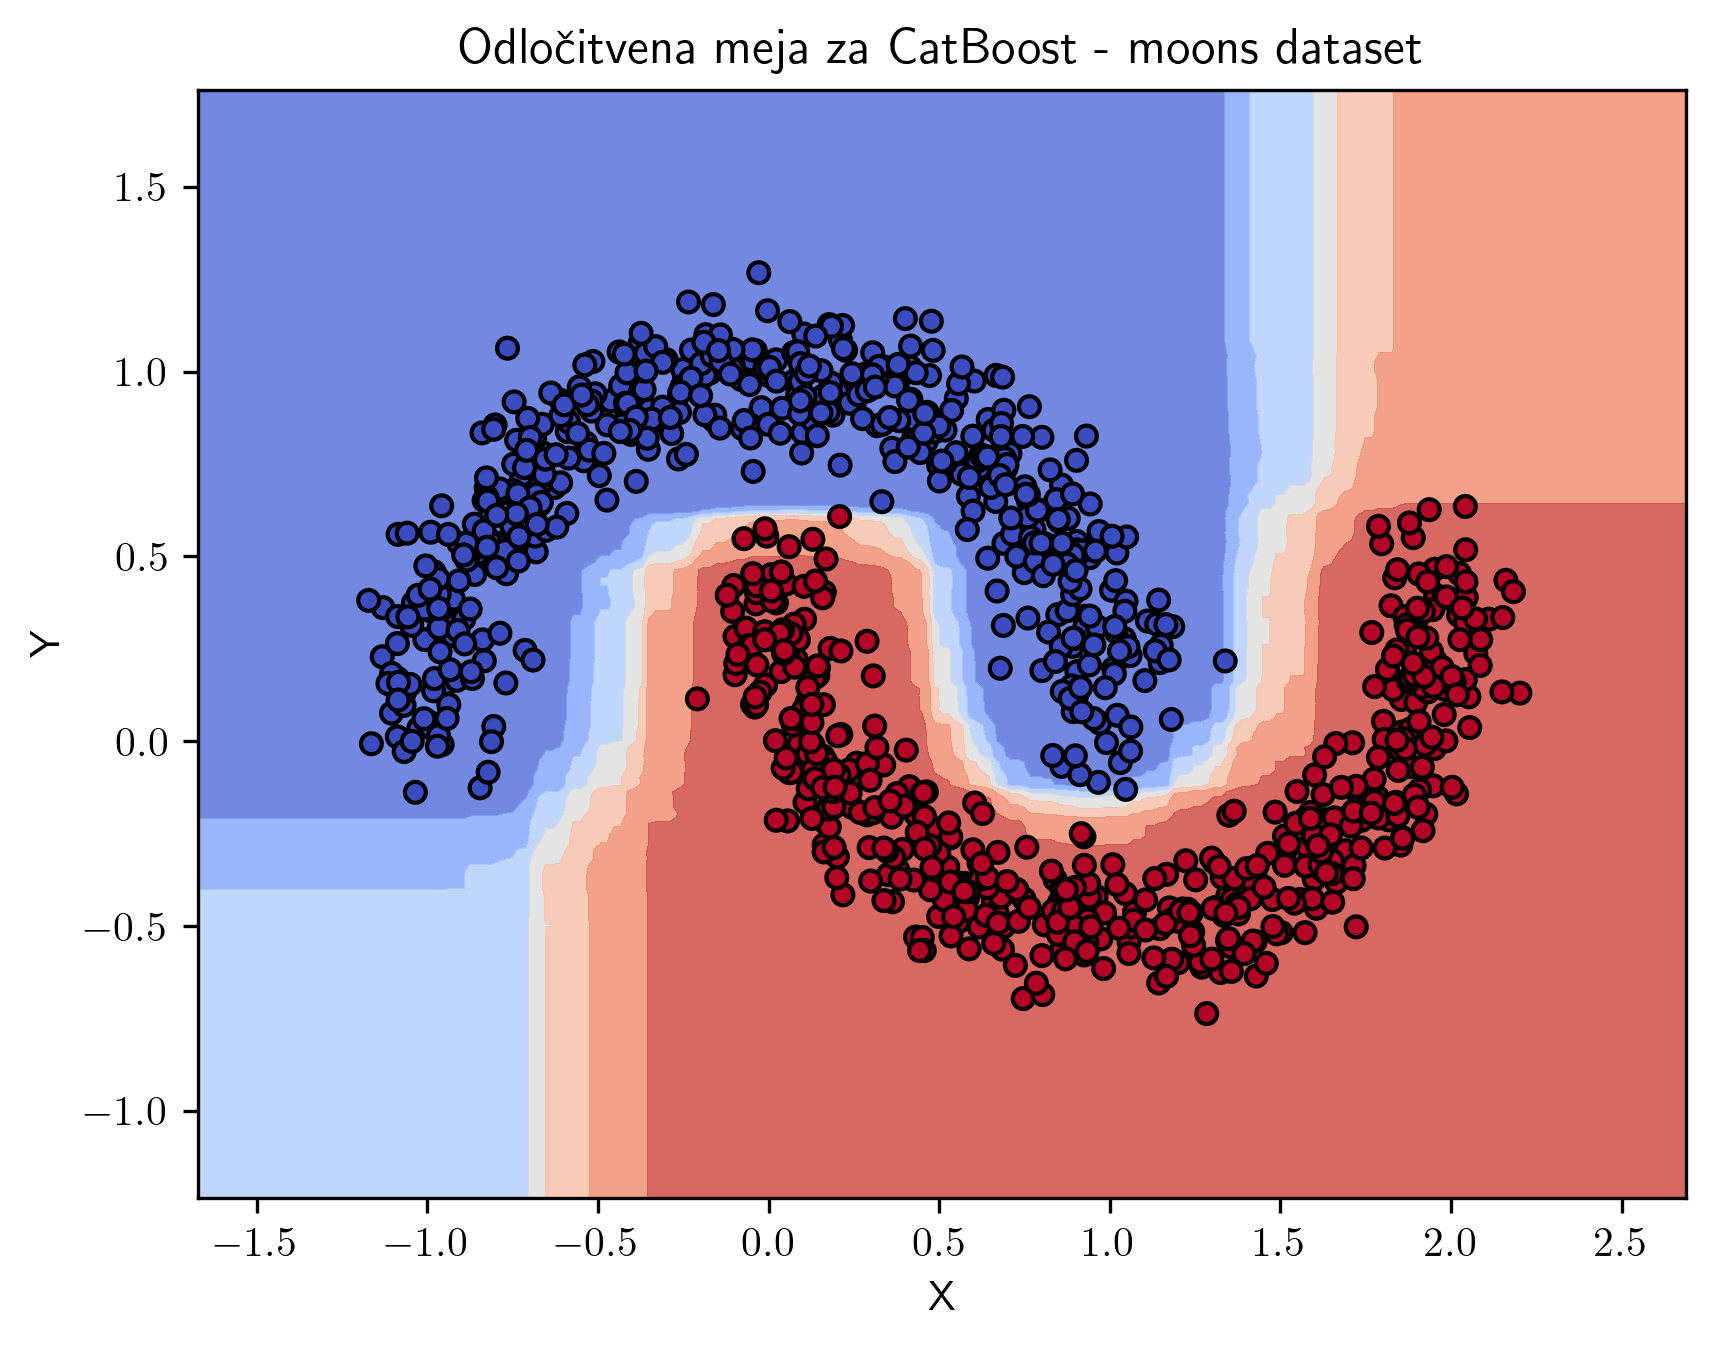

In [172]:

model = CatBoostClassifier(iterations=100, depth=6, loss_function='Logloss', verbose=0)
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_proba = model.predict_proba(X_test)
loss = log_loss(y_test, y_pred_proba)

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Odločitvena meja za CatBoost - moons dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [173]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=1000,
    validation_split=0.1,
    verbose=0  # Set to 1 if you want to see training progress
)

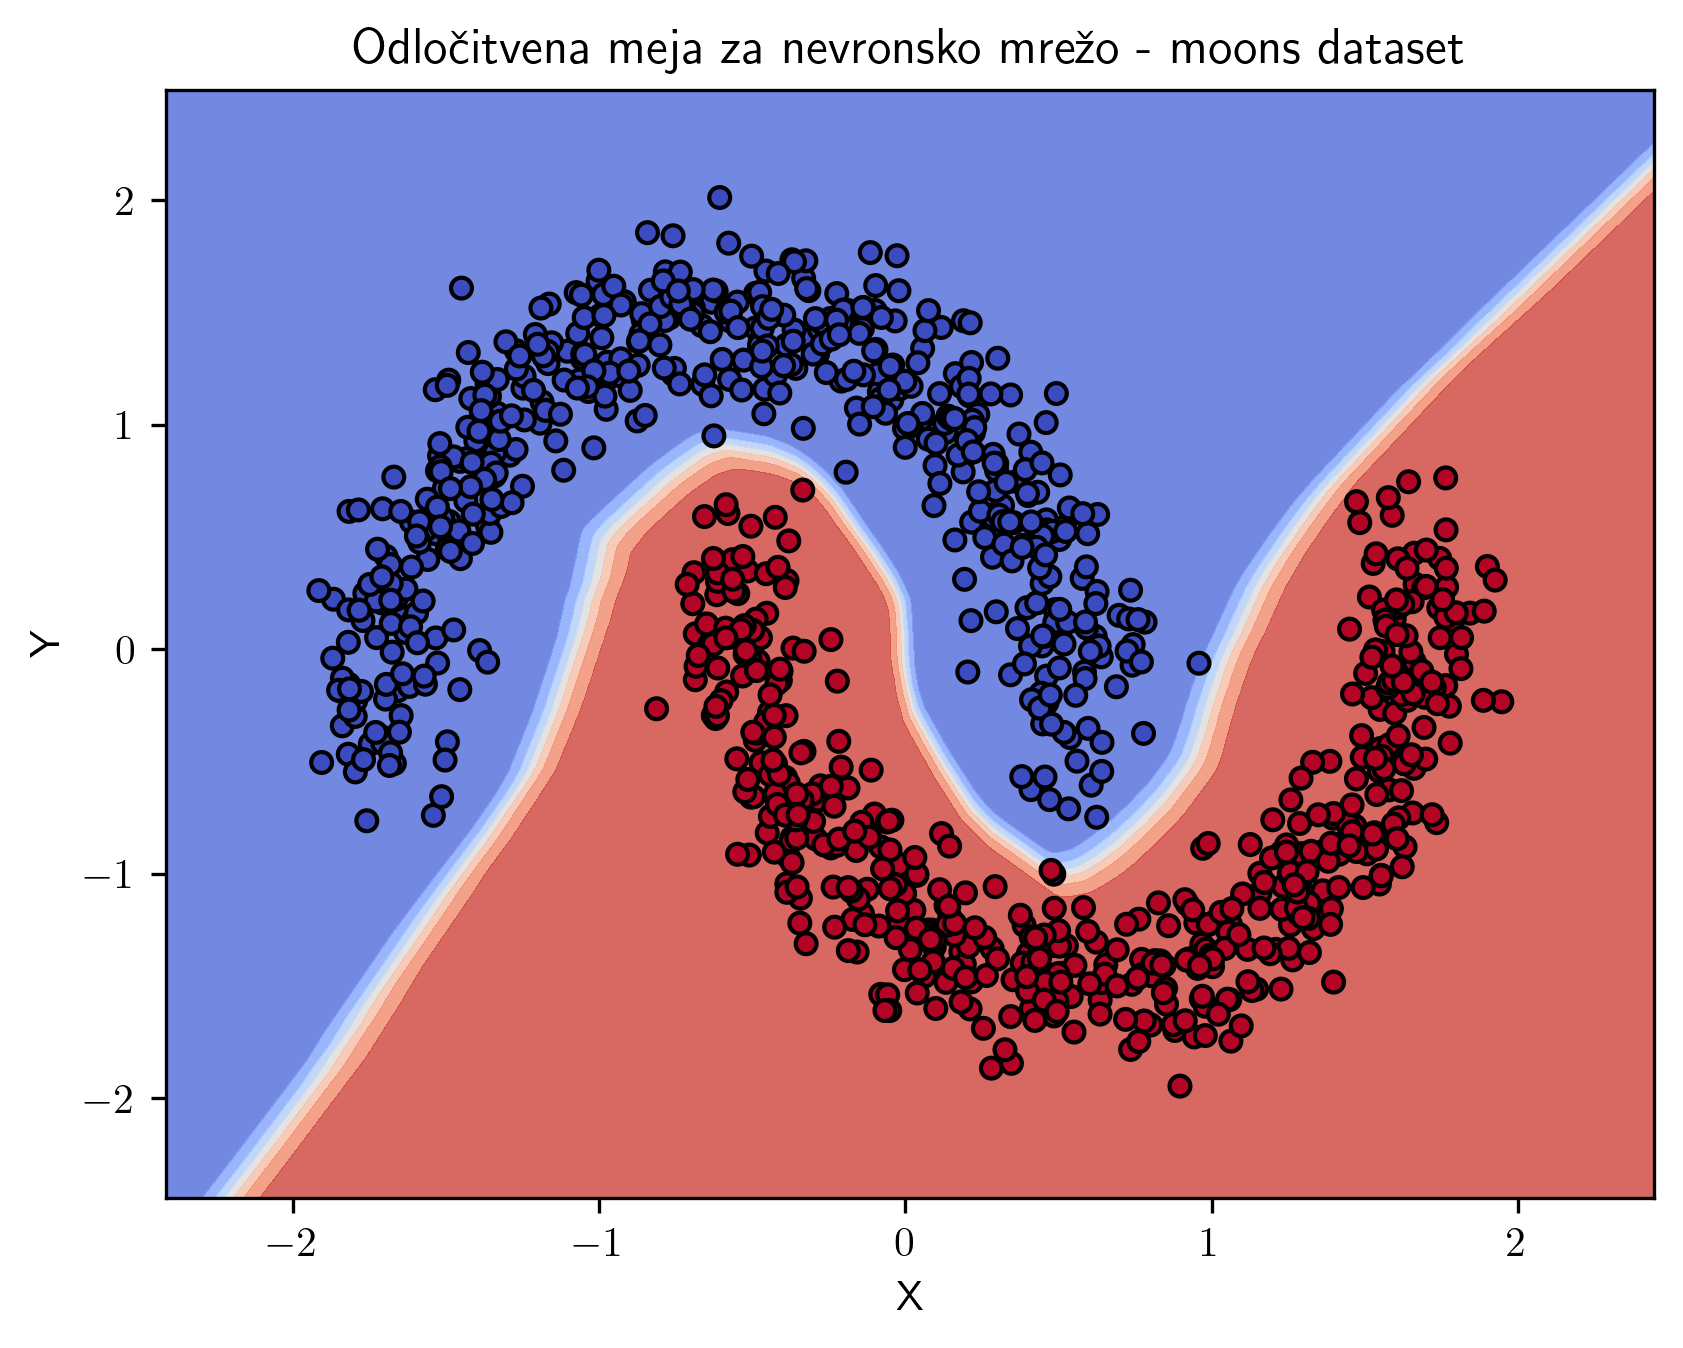

In [174]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Odločitvena meja za nevronsko mrežo - moons dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [175]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

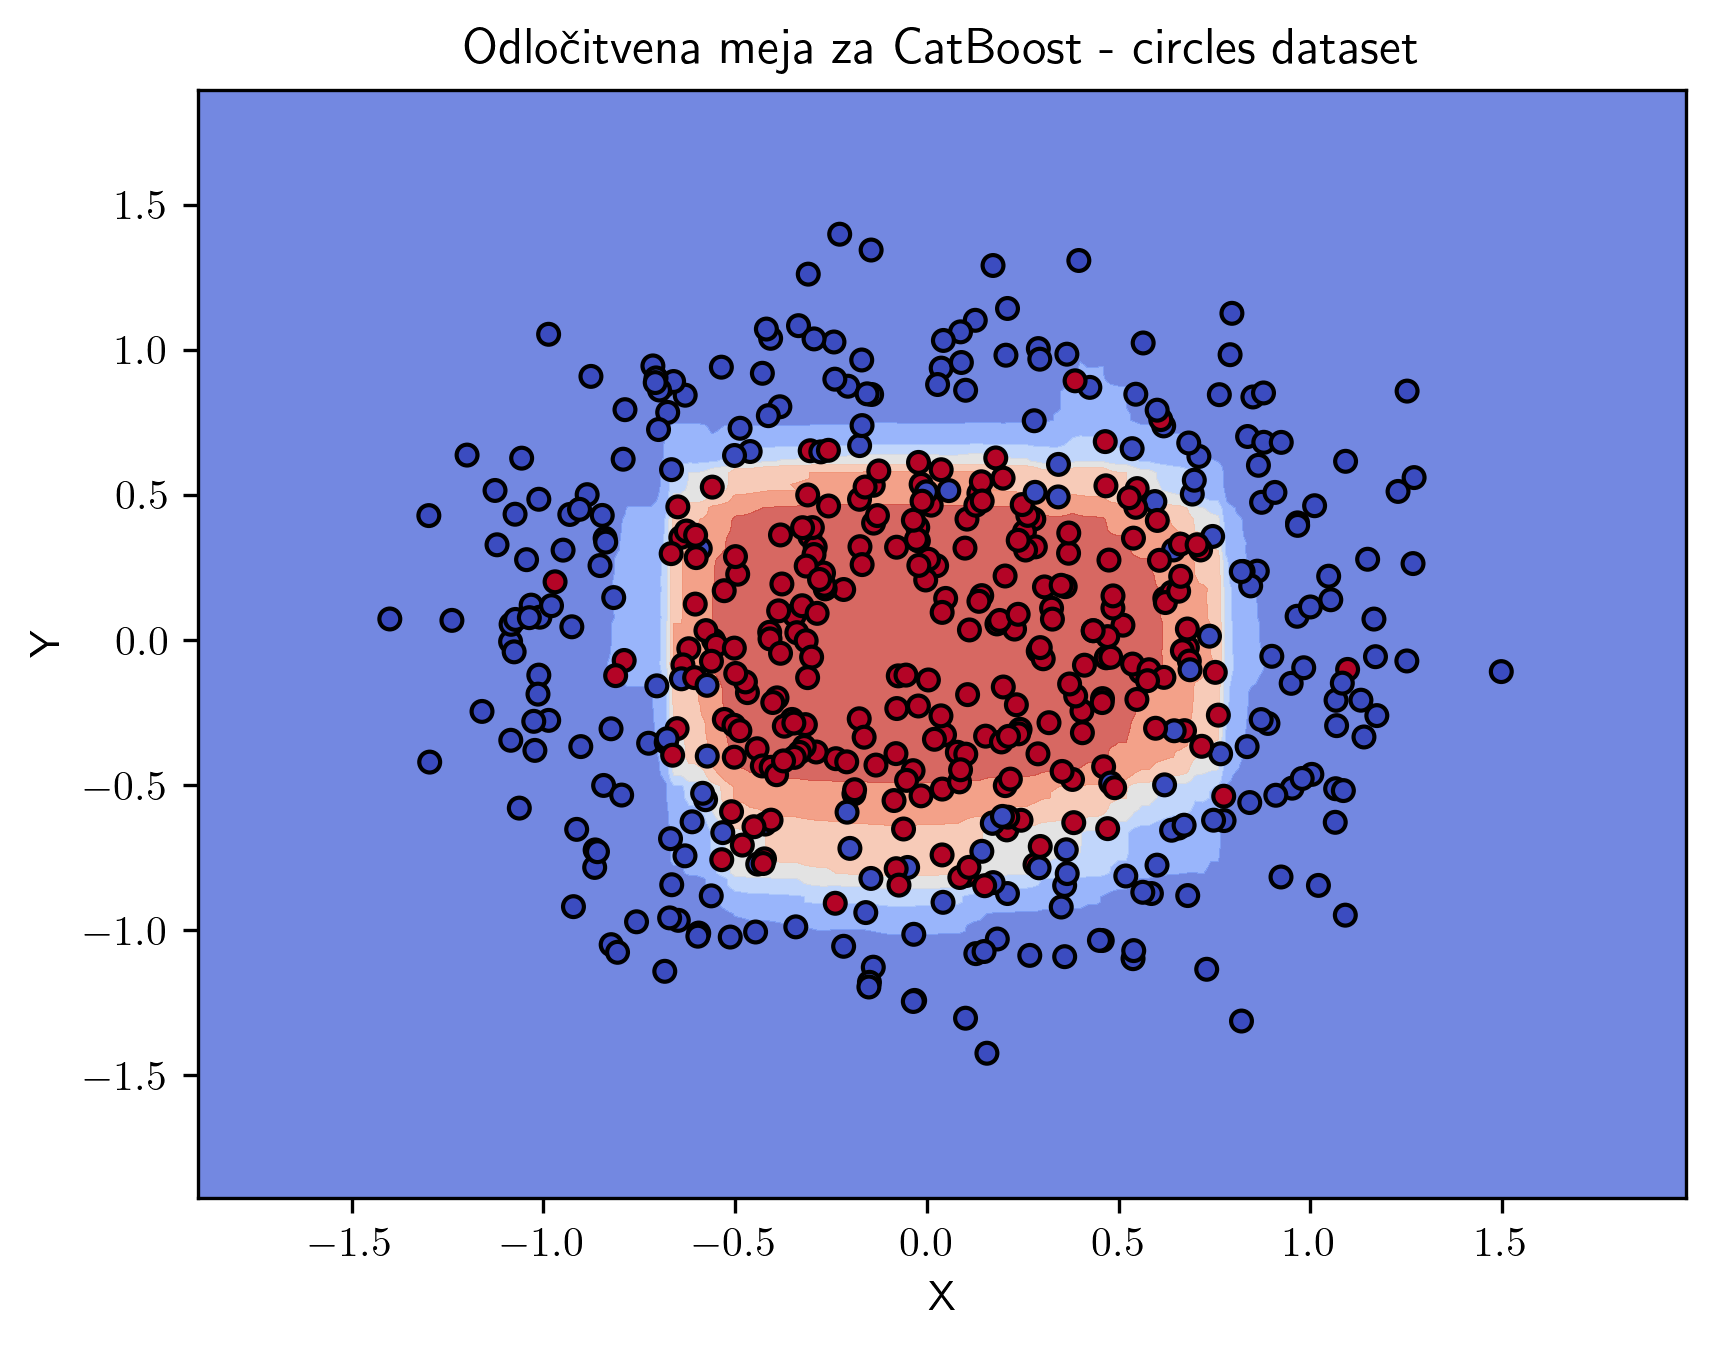

In [176]:

model = CatBoostClassifier(iterations=100, depth=6, loss_function='Logloss', verbose=0)
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_proba = model.predict_proba(X_test)
loss = log_loss(y_test, y_pred_proba)

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.title('Odločitvena meja za CatBoost - circles dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [177]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=1000,
    validation_split=0.1,
    verbose=0  # Set to 1 if you want to see training progress
)

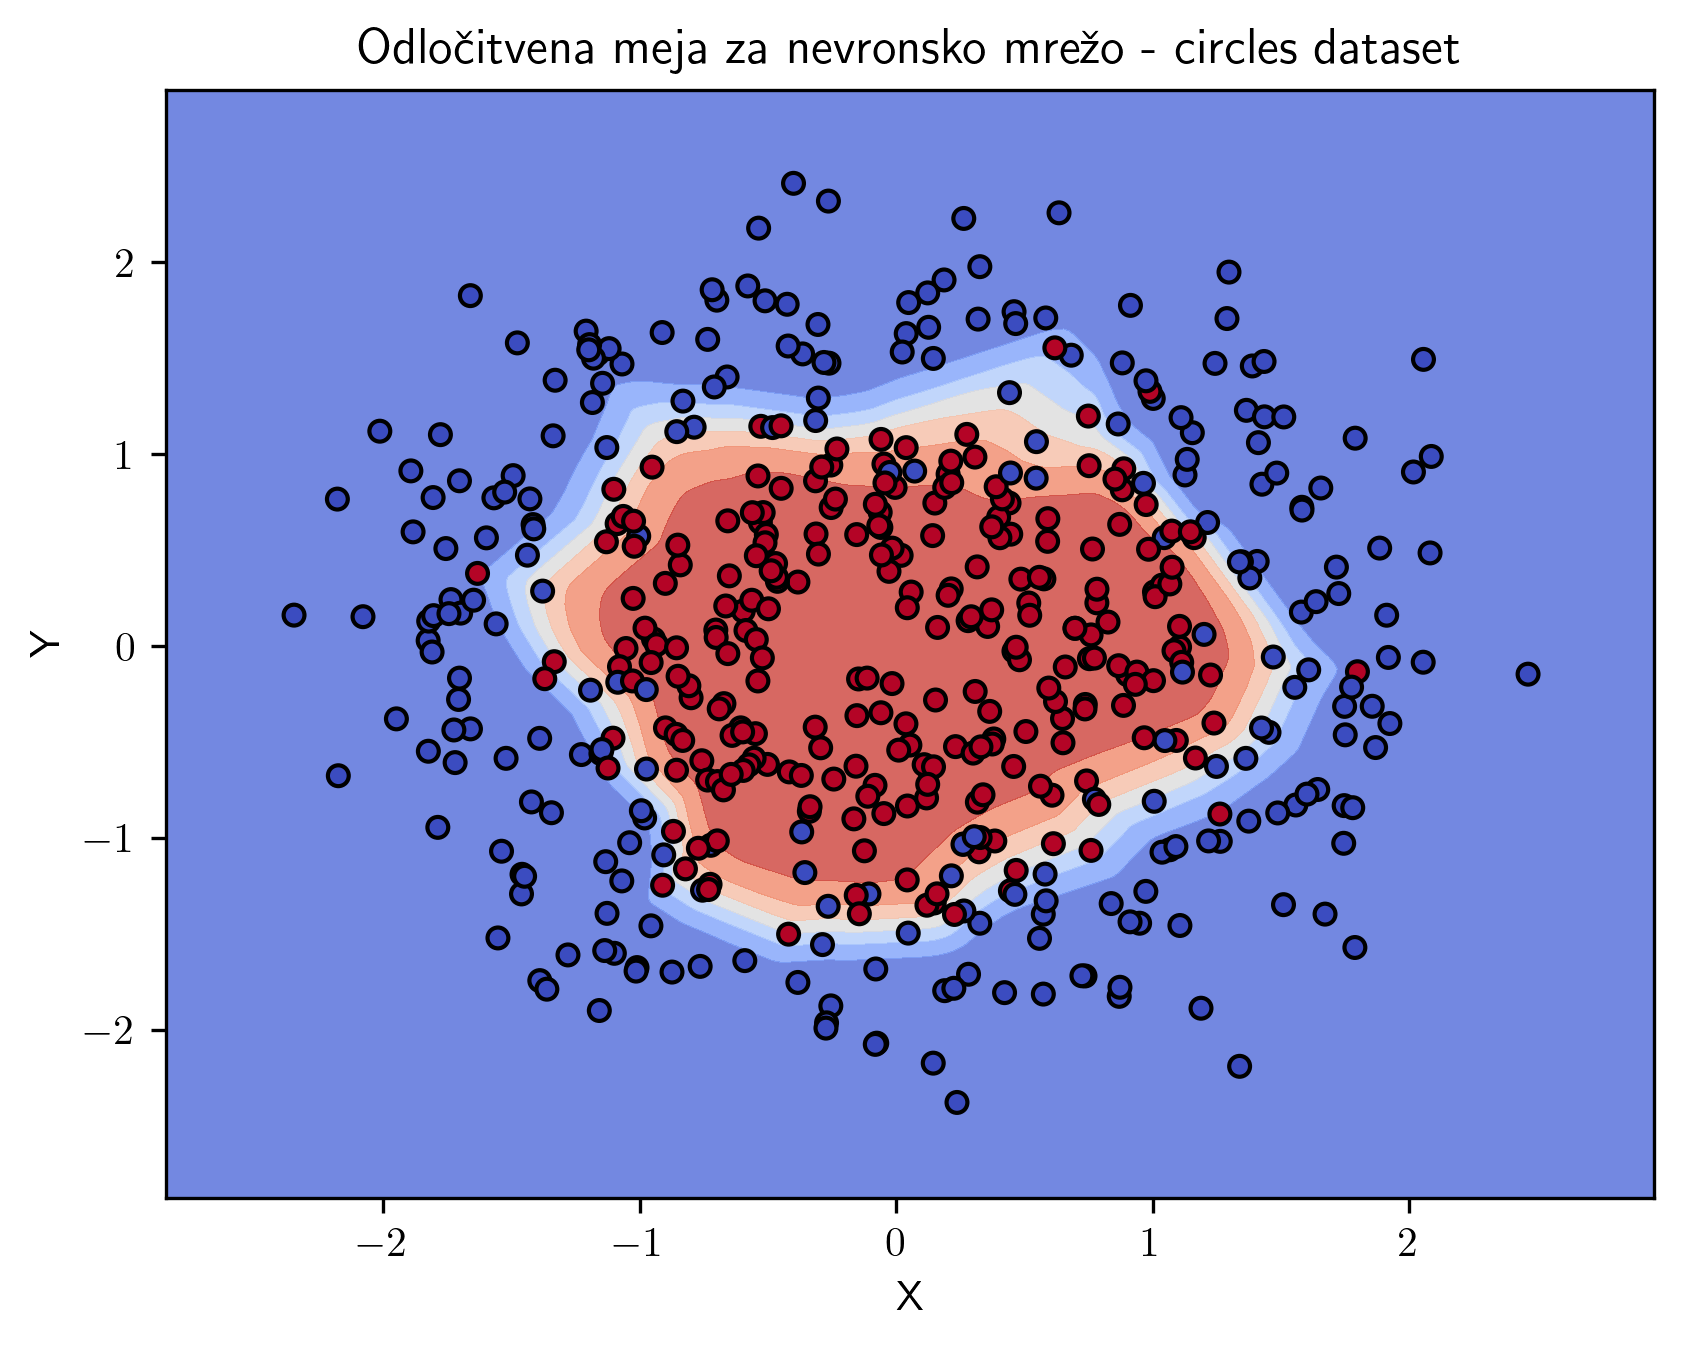

In [178]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Odločitvena meja za nevronsko mrežo - circles dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Opazimo, da meje pri globokih nevronskih mrežah izgledajo mnogo bolj zvezno in se bolje prilagajajo podatkom. Očitna prednost algoritmov tipa BDT pa je hitrost - tako inference kot treninga.

## Detektiranje Higgsovega bosona

Ker imamo opravka s strojnim učenjem, velik del zgodbe predstavljajo tudi podatkovni seti. Zato se mi zdi prav, da najprej pokomentiramo še podatke, na katerih se bo stroj učil. 

Na voljo imamo podmnožico 18 zveznih spremenljivk iz podatkovnega seta [HIGGS](https://archive.ics.uci.edu/dataset/280/higgs). Gre za kinematične lastnosti kot jih izmerijo detektorji v trkalniku delcev LHC (Large Hadron Collider). Celoten podatkovni set je bil zgeneriran s pomočjo Monte Carlo simulacij trkov in služi za trening algoritmov, ki zmorejo klasificirati podatke dobljene iz dejanskih eksperimentov. V spodnji tabeli najdemo skromen opis posameznih spremenljivk oz. "feature"-jev. 

| #  | Lastnost     | Opis lastnosti                                     | Tip     |
|----|------------------|----------------------------------------------------------|---------|
| 1  | lepton-pT        | $\vec{p}_T$ leptona                                     | Zvezna  |
| 2  | lepton-eta       | $\eta_{\ell}$ leptona                                   | Zvezna  |
| 3  | missing-energy   | $\vec{E}_{\text{miss}}$ energija nevtrinov              | Zvezna  |
| 4  | jet\_1-pt        | $\vec{p}_T$ prvega pljuska                              | Zvezna  |
| 5  | jet\_1-eta       | $\eta$ prvega pljuska                                   | Zvezna  |
| 6  | jet\_2-pt        | $\vec{p}_T$ drugega pljuska                             | Zvezna  |
| 7  | jet\_2-eta       | $\eta$ drugega pljuska                                  | Zvezna  |
| 8  | jet\_3-pt        | $\vec{p}_T$ tretjega pljuska                            | Zvezna  |
| 9  | jet\_3-eta       | $\eta$ tretjega pljuska                                 | Zvezna  |
| 10 | jet\_4-pt        | $\vec{p}_T$ četrtega pljuska                            | Zvezna  |
| 11 | jet\_4-eta       | $\eta$ četrtega pljuska                                | Zvezna  |
| 12 | m\_jj            | Inv. masa $m_{jj}$ dveh pljuskov                        | Zvezna  |
| 13 | m\_jjj           | Inv. masa $m_{jjj}$ treh pljuskov                       | Zvezna  |
| 14 | m\_lv            | Inv. masa $m_{\ell\nu}$ leptona in nevtrina              | Zvezna  |
| 15 | m\_jlv           | Inv. masa $m_{j\ell\nu}$ pljuska, leptona in nevtrina   | Zvezna  |
| 16 | m\_bb            | Inv. masa $m_{bb}$ dveh kvarkov dno                     | Zvezna  |
| 17 | m\_wbb           | Inv. masa $m_{Wbb}$ bozona $W^\pm$ in dveh b-kvarkov     | Zvezna  |
| 18 | m\_wwbb          | Inv. masa $m_{WWbb}$ dveh bozonov $W^\pm$ in dveh b-kvarkov | Zvezna  |


![Signal](./media/signal.png)

Na podlagi teh 18 karakteristik bomo poizkusili naš model naučiti razlikovati med podatki ozadja (torej takrat ko Higgsov boson ni prisoten) in podatki signala, kjer smo Higgsov boson zaznali. Statistično gledano, bomo iz modela dobili 4 tipe rezultatov:

1. **True Positive (TP):** Model je pravilno napovedal prisotnost bozona.
2. **False Positive (FP):** Model je napovedal prisotnost bozona, vendar ga v resnici ni bilo.
3. **True Negative (TN):** Model je pravilno napovedal, da bozona ni.
4. **False Negative (FN):** Model je napovedal, da bozona ni, vendar je bil v resnici prisoten.

Kako torej ocenimo uspešnost modela in jih med sabo primerjamo? Uvedemo 2 novi metriki **true positive rate (TPR)** in **false positive rate (FPR)**. V bolj domačem jeziku - kolikšen delež dejansko pozitivnih vrednosti je bil uspešno detektiran in analogno za negative. Formalno metriki definiramo kot:

$$ \textrm{TPR} = \frac{TP}{TP + FN} $$

$$ \textrm{FPR} = \frac{FP}{FP + TN} $$

![TFPR](./media/tf.webp)
> **Vir slike**: Maxwell, A.E.; Warner, T.A.; Guillén, L.A. Accuracy Assessment in Convolutional Neural Network-Based Deep Learning Remote Sensing Studies—Part 1: Literature Review. Remote Sens. 2021, 13, 2450. https://doi.org/10.3390/rs13132450

Če narišemo odvisnost TPR od FPR za vse možne vrednosti praga (decision threshold), dobimo krivuljo ROC (receiver operating characteristic). Uspešnejši modeli se s krivuljo bolj približajo zgornjemu levemu kotu grafa. Kot celotno oceno za uspešnost modela vpeljemo metriko AUC (Area under curve) tj. vrednost površine pod ROC krivuljo. Bližje kot je vrednosti 0.5 - tem slabši je model, bližje kot je vrednosti 1 - tem boljši je model. Za ilustracijo konceptov podamo v nadaljevanju 2 zgleda iz nadaljevanja naloge.


Klasifikacija na spektru [0, 1]             |  Metrika uspešnosti
:-------------------------:|:-------------------------:
![TFPR](./media/hist.png)  |  ![neki](./media/roc.png)



### Globoke nevronske mreže (DNN)

V nadaljevanju bomo sestavili osnovno nevronsko mrežo z dvema skritima nivojema. Uporabili bomo knjižnico `TensorFlow` in učenje zagnali v okolju `Google Colab` na hardwaresko pospešenih enotah TPU enotah `T4`. Začetni hiperparametri naše mreže so:

- število nevronov: 50
- število skritih plasti: 2
- aktivacijska funkcija: ReLU
- aktivacijska funkcija na koncu: sigmoid
- optimizacijski algoritem: adam
- funkcija izgube: binary cross-entrophy
- normalizacija: na interval [0,1]
- število epoh: 10
- velikost batchov: 100
- odstotek za testiranje: 10 %

V nadaljevanju bomo spreminjali posamezne hiperparametre in opazovali, kako spreminjanje le-teh vpliva na metriko `AUC`.

> **Opazka**: Sklepam, da je v novejših verzijah TensorFlow-a prišlo do sprememb in je za uporabo našega data seta potrebno izhod iz nevronske mreže še preoblikovati z dodatnim (sicer trivialnim) nivojem: `dnn.add(Lambda(lambda x: tf.squeeze(x, axis=-1)))` 

| Sprememba parametra                      |   AUC   |
|------------------------------------------|---------|
| Osnovni parametri                        |  0.7591 |
| Število nevronov: 100                    |  0.7573 |
| Št. skritih slojev: 5                    |  0.7554 |
| Št. skritih slojev: 50                   |  0.5000 |
| Aktivacijska funkcija: ELU               |  0.7454 |
| Funkcija izgube: MSE                     |  0.7480 |
| Optimizacijski algoritem: SGD            |  0.6768 |
| Optimizacijski algoritem: Adamax         |  0.7505 |
| Velikost batcha: 1 000                   |  0.7385 |
| Velikost batcha: 10 000                  |  0.6873 |
| Število epoh: 20                         |  0.7532 |
| Število epoh: 100                        |  0.101  |
| Odstotek za testiranje: 20 %             |  0.7562 |
| Normalizacija: $\mu = 0$ in $\sigma = 1$ |  0.8144 |

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import data_higgs as dh
import tensorflow as tf

import os
import random
import plotting
from tensorflow import keras
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Lambda
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping



In [221]:
BATCH_SIZE = 1000
SEED_VALUE= 10001
nepoch = 100

os.environ['PYTHONHASHSEED']=str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [222]:
def split_xy(rawdata):
    data_y=rawdata['hlabel'] # labels only: 0.=bkg, 1.=sig
    data_x=rawdata.drop(['hlabel'], axis=1) # features only

    #now prepare the data
    mu = data_x.mean()
    s = data_x.std()
    dmax = data_x.max()
    dmin = data_x.min()

    # normal/standard rescaling
    #data_x = (data_x - mu)/s

    # scaling to [-1,1] range
    #data_x = -1. + 2.*(data_x - dmin)/(dmax-dmin)

    # scaling to [0,1] range
    data_x = (data_x - dmin)/(dmax-dmin)

    return data_x,data_y

Entries in the file:  ['/feature_names', '/train', '/valid']
Entries read 18 with feature names ['lepton-pT' 'lepton-eta' 'missing-energy' 'jet_1-pt' 'jet_1-eta'
 'jet_2-pt' 'jet_2-eta' 'jet_3-pt' 'jet_3-eta' 'jet_4-pt' 'jet_4-eta'
 'm_jj' 'm_jjj' 'm_lv' 'm_jlv' 'm_bb' 'm_wbb' 'm_wwbb']
Shapes train:(360000, 18) and test:(40000, 18)
Y shapes: (360000,) and (40000,)


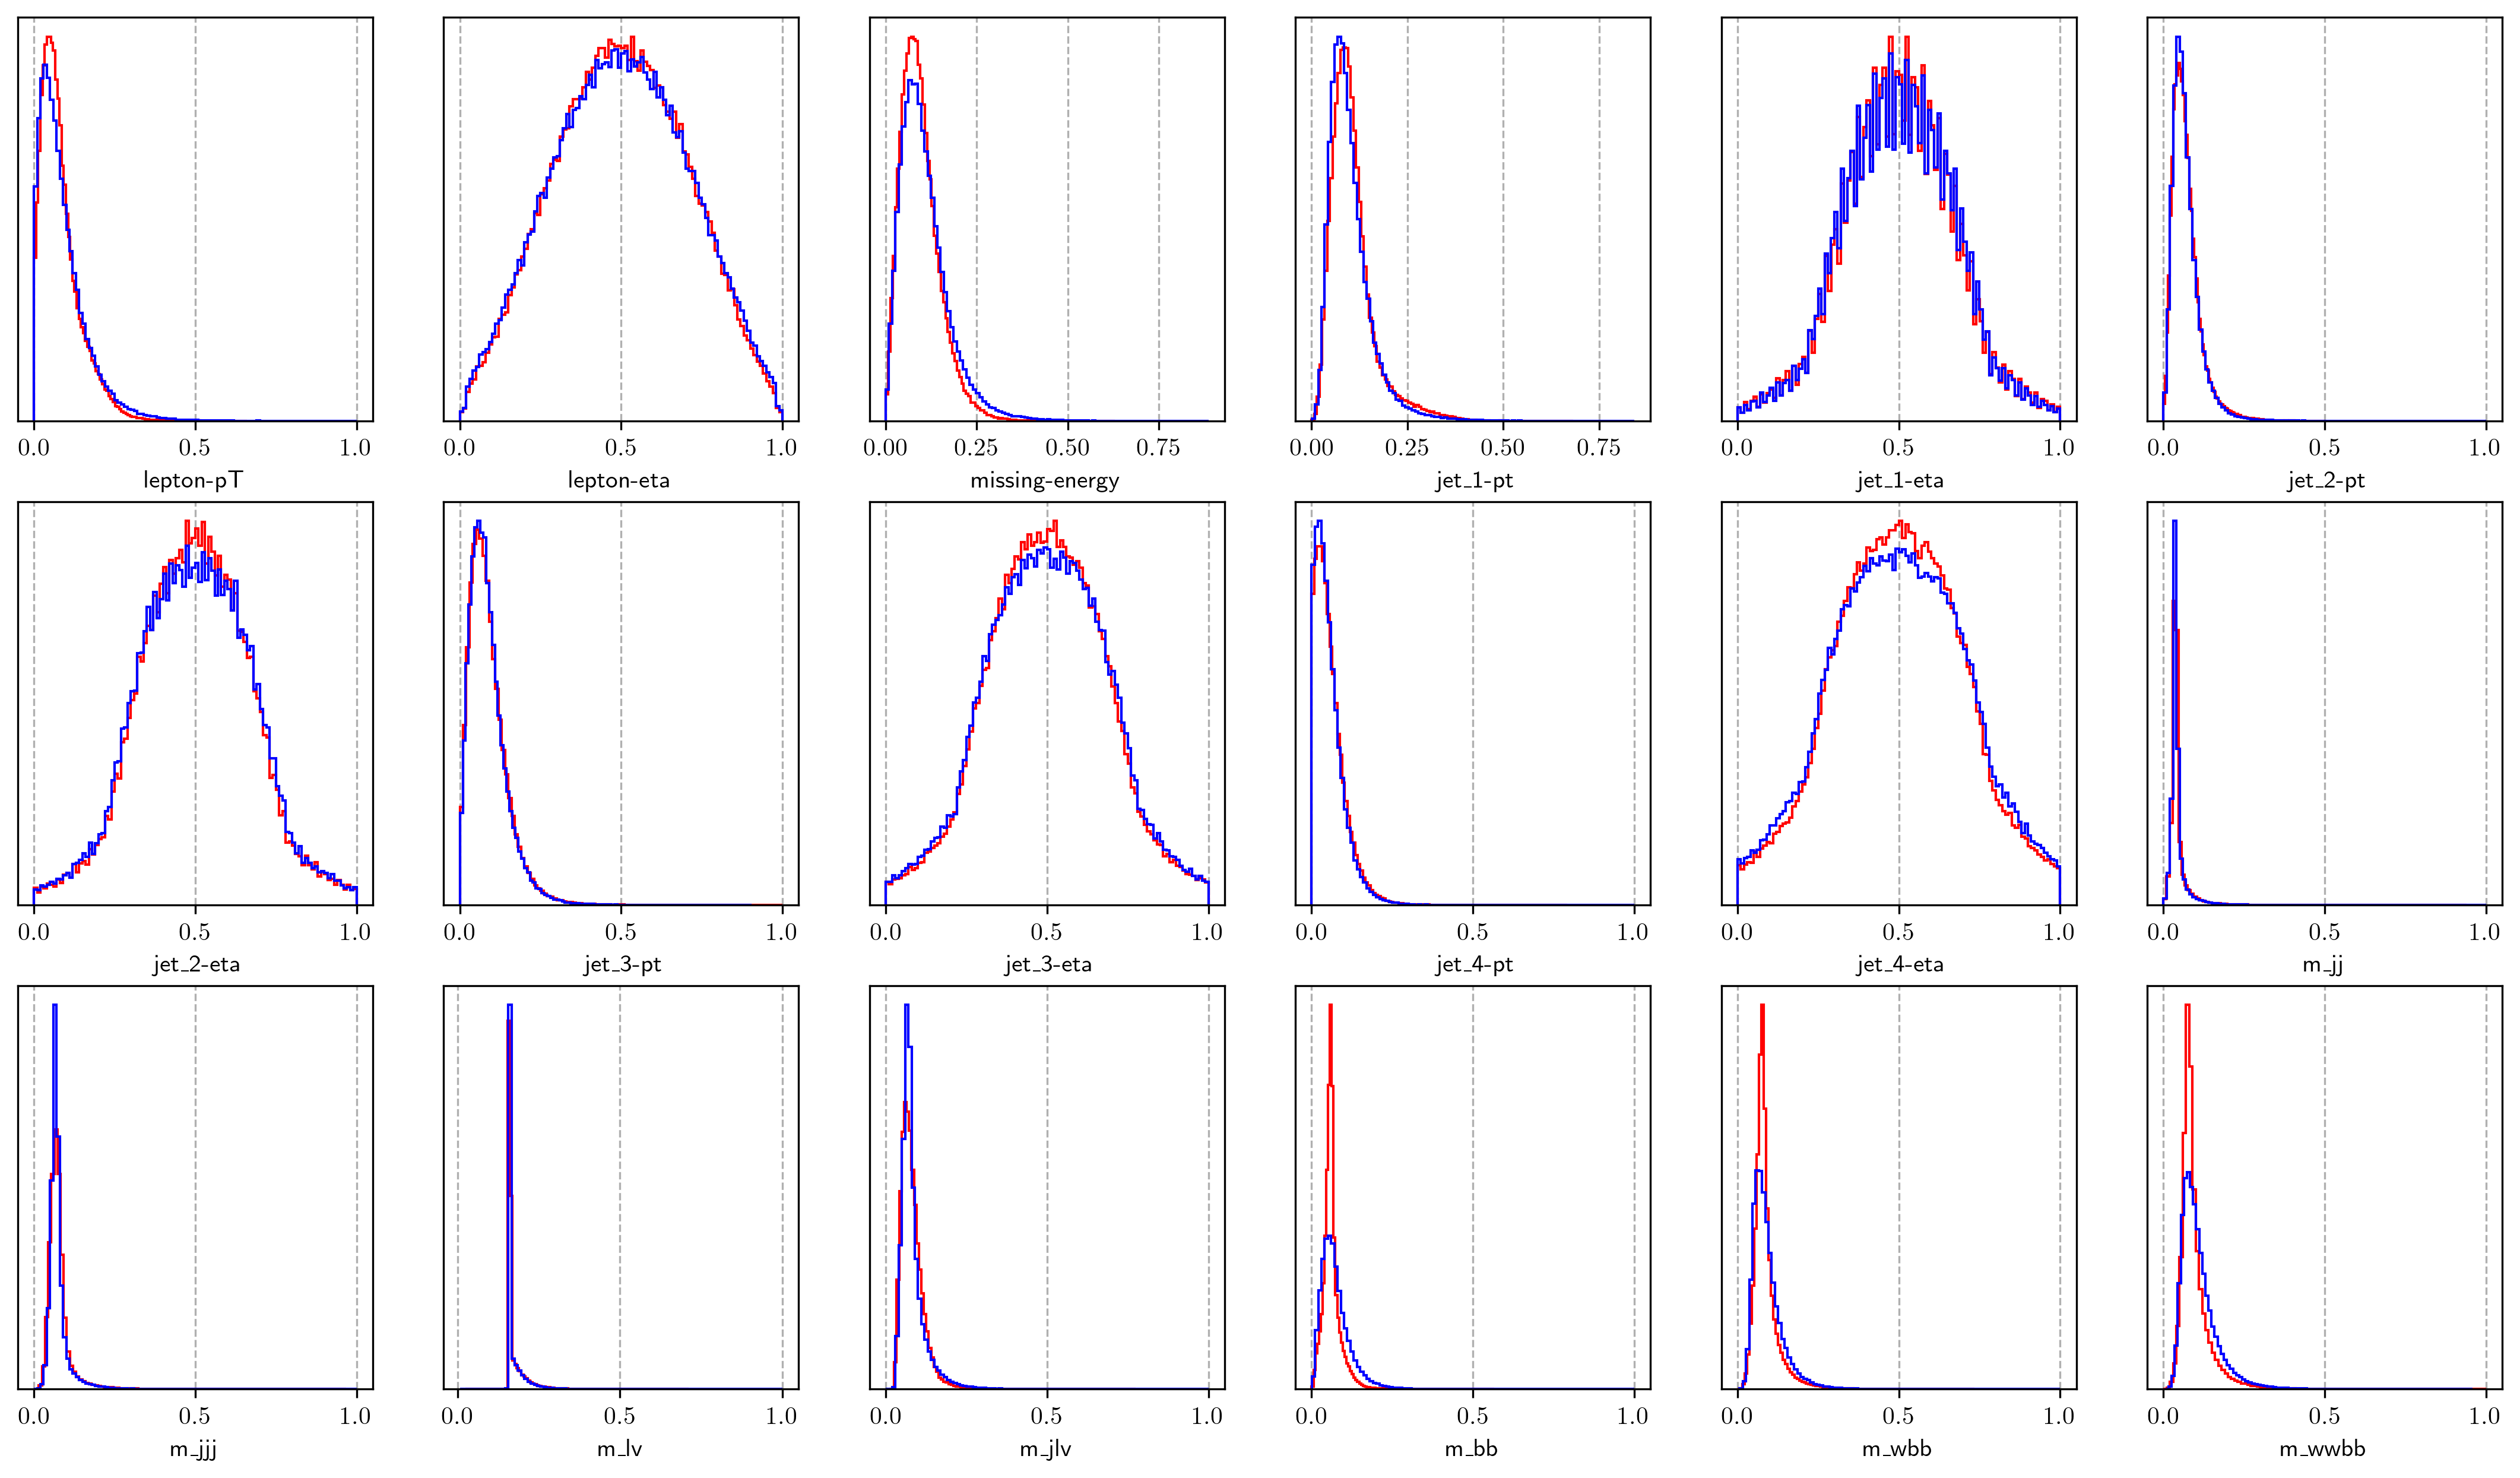

Steps train:360 and test:40
Features: (1000, 18)
Labels: (1000,)
Features: (1000, 18)
Labels: (1000,)


/Users/luka/.pyenv/versions/3.11.2/envs/phys/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_240 (Dense)               │ (None, 50)             │           950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None)                 │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,551 (13.87 KB)

 Trainable params: 3,551 (13.87 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - AUC: 0.5608 - accuracy: 7.1265e-04 - binary_crossentropy: 0.7085 - loss: 0.7085 - val_AUC: 0.5308 - val_accuracy: 0.0000e+00 - val_binary_crossentropy: 0.6910 - val_loss: 0.6910
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - AUC: 0.5375 - accuracy: 0.0000e+00 - binary_crossentropy: 0.7117 - loss: 0.7117 - val_AUC: 0.5160 - val_accuracy: 0.0000e+00 - val_binary_crossentropy: 0.6912 - val_loss: 0.6912
Epoch 3/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - AUC: 0.5225 - accuracy: 0.0069 - binary_crossentropy: 0.7959 - loss: 0.7959 - val_AUC: 0.5000 - val_accuracy: 0.4250 - val_binary_crossentropy: 7.4515 - val_loss: 7.4515
Epoch 4/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - AUC: 0.5000 - accuracy: 0.5162 - binary_crossentropy: 7.5174 - loss: 7.5174 - val_AUC: 0.5000 - val_accuracy: 0.4250 - val_binary_crossentropy: 7.4515 - val_loss: 7.4515
Epoch 5/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - AUC: 0.5001 - accuracy:

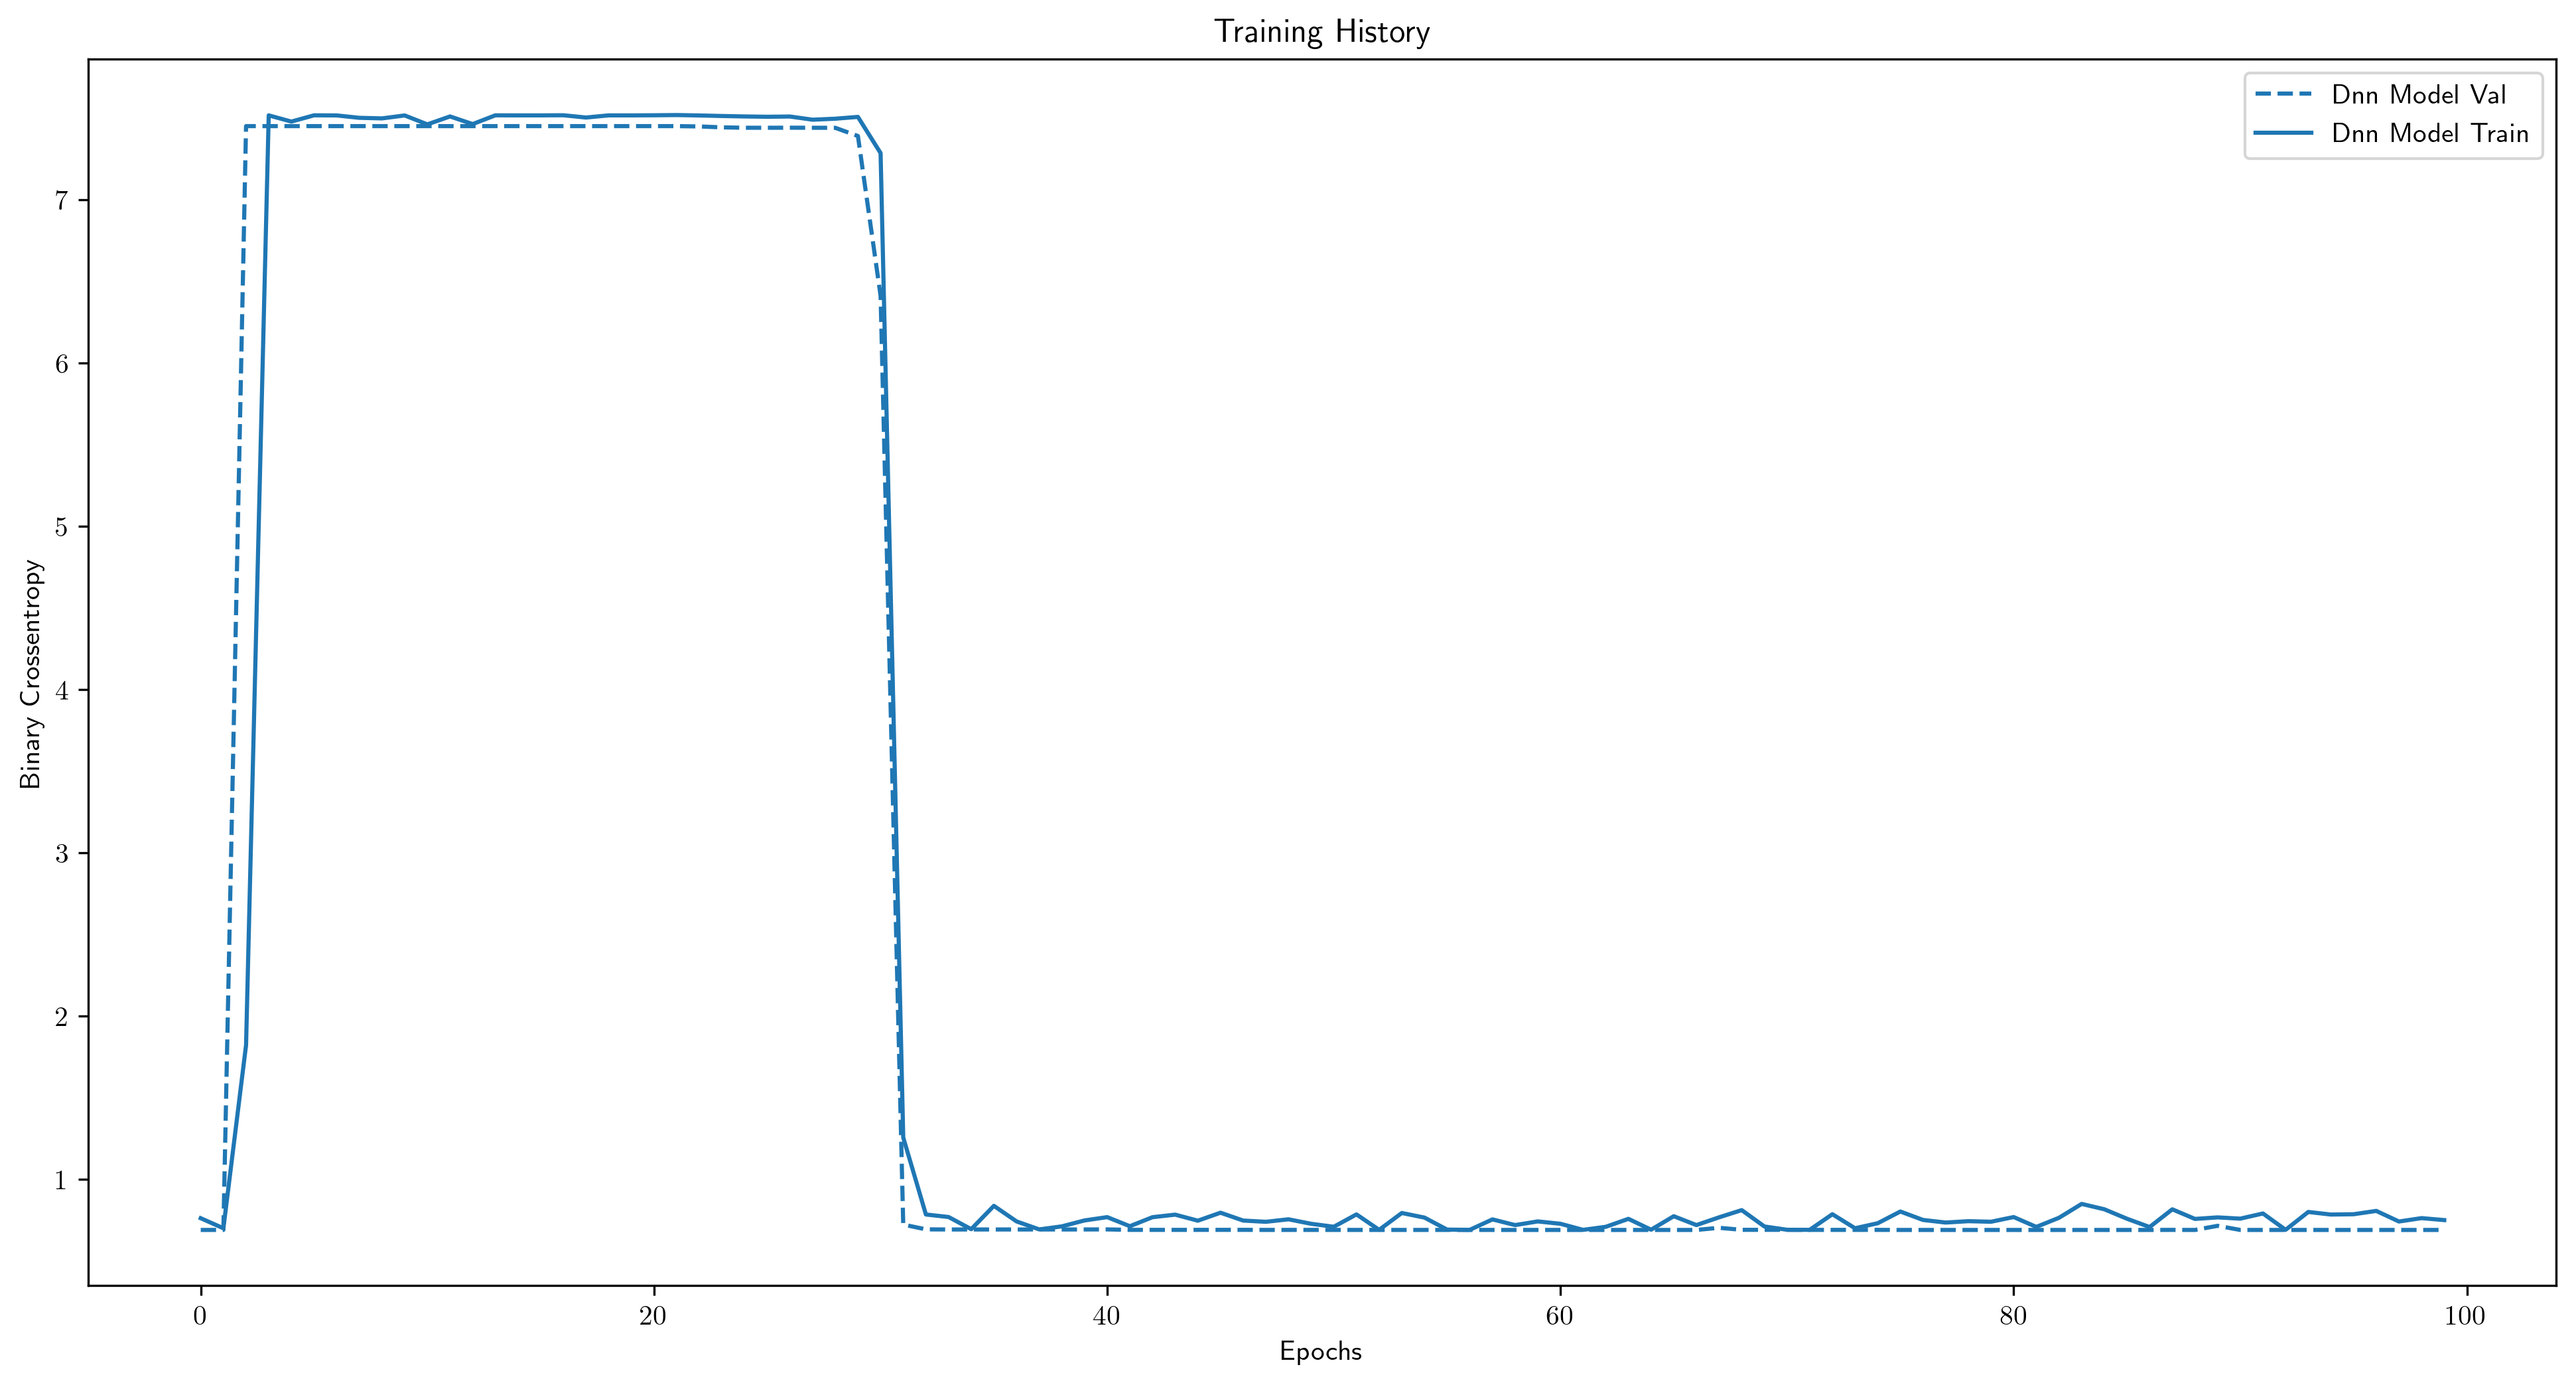

KeyError: 'val_auc'

<Figure size 4800x2400 with 0 Axes>

In [224]:
hdata = pd.HDFStore('./data/higgs-parsed/higgs-parsed.h5', 'r')
print("Entries in the file: ",hdata.keys())

data_fnames=hdata['feature_names'].to_numpy()[1:] #drop labels
n_dims=data_fnames.shape[0]

print ("Entries read {} with feature names {}".format(n_dims,data_fnames))

x_trn,y_trn=split_xy(hdata['train']) # training sample, should split a fraction for testing
p = 0.9
N = len(x_trn)
x_train, x_test,y_train, y_test =  x_trn[:int(p*N)], x_trn[int(p*N):], y_trn[:int(p*N)], y_trn[int(p*N):] #train_test_split(x_trn,y_trn,test_size=0.1) # 10% split
x_val,y_val=split_xy(hdata['valid']) # independent cross-valid sample


print("Shapes train:{} and test:{}".format(x_train.shape,x_test.shape))
print("Y shapes: {} and {}".format(y_train.shape,y_test.shape))

#plot distributions
plotting.plot_sig_bkg_from_np_arrays(x_train.to_numpy(),y_train.to_numpy(),data_fnames,logy=False)

# ready the data for TF
ds_train = tf.data.Dataset.from_tensor_slices((x_train.to_numpy(),y_train.to_numpy()))
ds_train = ds_train.repeat()
ds_train = ds_train.batch(BATCH_SIZE,drop_remainder=True)

ds_test = tf.data.Dataset.from_tensor_slices((x_test.to_numpy(),y_test.to_numpy()))
ds_test = ds_test.repeat()
ds_test = ds_test.batch(BATCH_SIZE,drop_remainder=True)    

train_steps=int(x_train.shape[0]/BATCH_SIZE)
test_steps=int(x_test.shape[0]/BATCH_SIZE)
print("Steps train:{} and test:{}".format(train_steps,test_steps))

for x, y in ds_train.take(1):
    print("Features:", x.numpy().shape)
    print("Labels:", y.numpy().shape)

for x, y in ds_test.take(1):
    print("Features:", x.numpy().shape)
    print("Labels:", y.numpy().shape)


# build a model - a DNN in TF 2.0
dnn = Sequential([
    Input(shape=(n_dims,)), 
    Dense(50, input_dim=n_dims, activation='relu'),
    Dense(50, input_dim=n_dims, activation='relu'),
    Dense(1, activation='sigmoid'),
    Lambda(lambda x: tf.squeeze(x, axis=-1))  # Converts (None, 1) to (None,)
])

dnn.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'binary_crossentropy'])

dnn.summary()

#optional early stopping
eval_metric = 'AUC'
earlystop_callback = EarlyStopping(
        mode='max',
        monitor='val_' + eval_metric,
        patience=5,
        min_delta=0.00001,
        verbose=1
    )

print()

#run the training
dnn_model_history = dnn.fit(ds_train,
        epochs=nepoch,
        steps_per_epoch=train_steps,
        #callbacks=[earlystop_callback],
        validation_data=ds_test,
        validation_steps=test_steps
    )

#plot training history
print("history values",dnn_model_history.history.keys())
plotting.plot_history([('DNN model', dnn_model_history),],key='binary_crossentropy')
plotting.plot_history([('DNN model', dnn_model_history),],key='auc')
plotting.plot_history([('DNN model', dnn_model_history),],key='accuracy')

#plot & print results like ROC and score distribution etc...
y_score=dnn.predict(x_val.to_numpy())[:,0]
plotting.plot_roc(y_val,y_score)
plotting.plot_score(y_val,y_score)
print()
auc=roc_auc_score(y_val,y_score)
print("AUC score: {}".format(auc))


## Zaključek

---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/12_mlearn), 2024